In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes


In [14]:
# decision tree rgresion
df=load_diabetes(as_frame=True).frame


In [15]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [16]:
X=df.drop("target",axis=1)
y=df["target"]

In [17]:
# split into two parts

X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.3,random_state=42
)

In [ ]:
# model train with the help of the regressor decision tree
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

print("MSE train: ",mean_squared_error(y_train,y_pred_train))
print("MSE test: ",mean_squared_error(y_test,y_pred_test))

print("r2 train: ",r2_score(y_train,y_pred_train))
print("r2 test: ",r2_score(y_test,y_pred_test))

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
)

plt.tight_layout()


## r2 score is 1 thats mean data is overfit ,so we solve this problem using prepuning

In [10]:
# model train with the help of the regressor decision tree
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(max_depth=7,min_samples_leaf=20)
model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)

MSE train:  2795.7093704335157
MSE test:  3177.664925233041
r2 train:  0.5452860742356658
r2 test:  0.41135906558189406


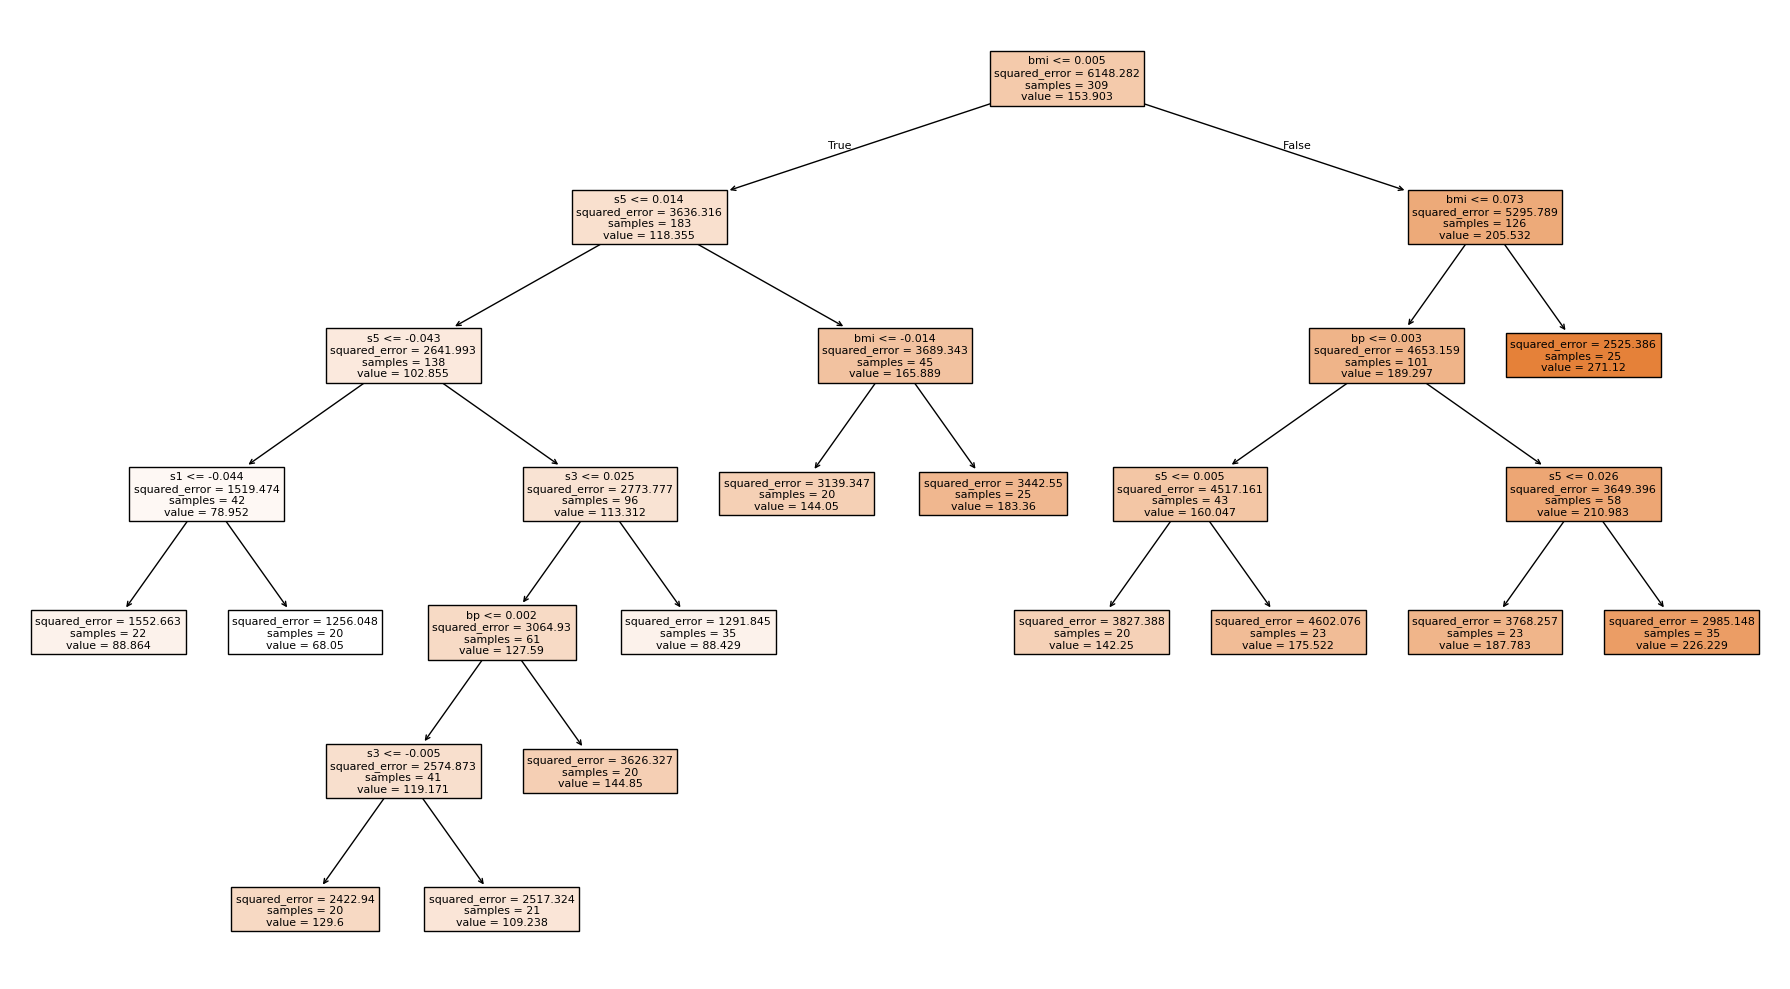

In [11]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import  accuracy_score

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

print("MSE train: ",mean_squared_error(y_train,y_pred_train))
print("MSE test: ",mean_squared_error(y_test,y_pred_test))

print("r2 train: ",r2_score(y_train,y_pred_train))
print("r2 test: ",r2_score(y_test,y_pred_test))

# print(" accuracy score : ",accuracy_score(y_test,y_pred_test))

from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
)

plt.tight_layout()


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(
    n_estimators=401,
    oob_score=True,
)

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(" OOB score : ",rf.oob_score_)


 OOB score :  0.4413803788544718


In [26]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

print("MSE train: ",mean_squared_error(y_train,y_pred_train))
print("MSE test: ",mean_squared_error(y_test,y_pred_test))

print("r2 train: ",r2_score(y_train,y_pred_train))
print("r2 test: ",r2_score(y_test,y_pred_test))

MSE train:  468.45660727326856
MSE test:  2911.4964329187906
r2 train:  0.923806907400236
r2 test:  0.46066497848176613
